# Requirements

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Load & Display Image

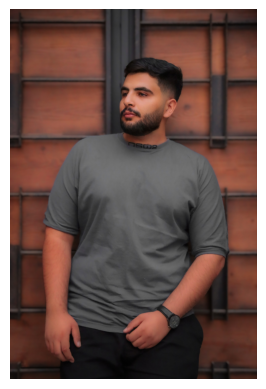

In [4]:
# image address
image_address = os.path.join("images", "my_image.jpg")

# read the image file
image = cv2.imread(image_address)

# convert channels from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

# Creating Sketch

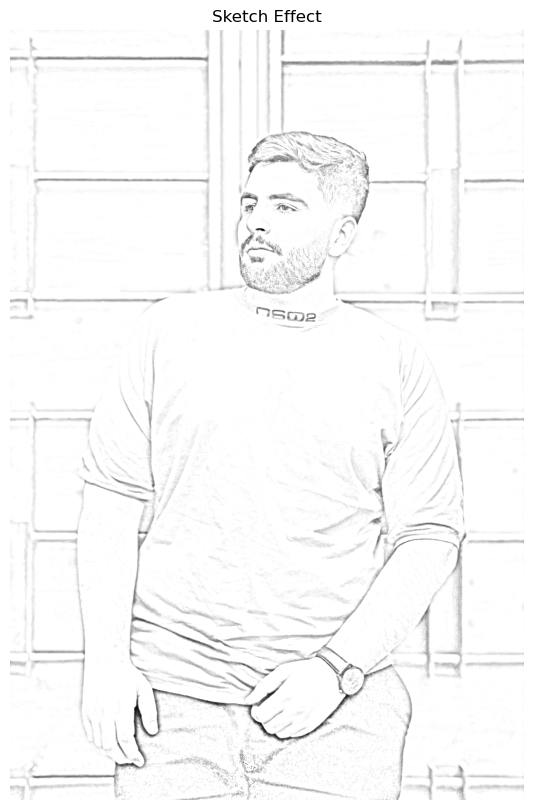

In [5]:
# image address
image_address = os.path.join("images", "my_image.jpg")

# read the image file
image = cv2.imread(image_address)

# convert channels from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the input image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image (i.e., produce a negative of the grayscale image)
inverted_image = 255 - gray_image

# Apply Gaussian blur to the inverted image with a kernel size of 21x21
blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

# Invert the blurred image to produce a semi-transparent effect
inverted_blur = 255 - blur_image

# Divide the grayscale image by the inverted blurred image to produce the sketch effect
sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

# display
plt.figure(figsize=(10, 10))
plt.imshow(sketch, cmap="gray")
plt.title("Sketch Effect")
plt.axis("off")
plt.show()


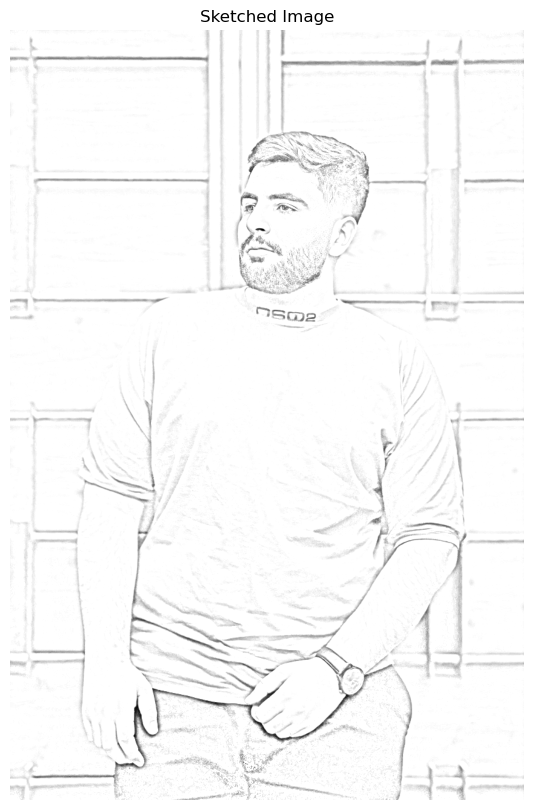

In [6]:
def convert_to_sketch(image_rgb):
    """
    Converts an RGB image to a sketch effect.
    
    Args:
    - image_rgb: Input image in RGB format
    
    Returns:
    - sketch: The sketched output image
    """
    # Convert the input image from RGB to grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    
    # Invert the grayscale image (produce a negative of the grayscale image)
    inverted_image = 255 - gray_image
    
    # Apply Gaussian blur to the inverted image with a kernel size of 21x21
    blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    
    # Invert the blurred image to produce a semi-transparent effect
    inverted_blur = 255 - blur_image
    
    # Divide the grayscale image by the inverted blurred image to produce the sketch effect
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)
    
    return sketch

# Example usage
image_address = "images/my_image.jpg"  # Adjust image path as necessary
image = cv2.imread(image_address)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to sketch
sketched_image = convert_to_sketch(image_rgb)

# Display the sketched image
plt.figure(figsize=(10, 10))
plt.imshow(sketched_image, cmap="gray")
plt.title("Sketched Image")
plt.axis("off")
plt.show()



# Sketching WebCam Video Stream in Real-time


In [8]:
def convert_to_sketch(image_rgb):
    """
    Converts an RGB image to a sketch effect.
    
    Args:
    - image_rgb: Input image in RGB format
    
    Returns:
    - sketch: The sketched output image
    """
    # Convert the input image from RGB to grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    
    # Invert the grayscale image (produce a negative of the grayscale image)
    inverted_image = 255 - gray_image
    
    # Apply Gaussian blur to the inverted image with a kernel size of 21x21
    blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    
    # Invert the blurred image to produce a semi-transparent effect
    inverted_blur = 255 - blur_image
    
    # Divide the grayscale image by the inverted blurred image to produce the sketch effect
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)
    
    return sketch

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Get the frame width and height for saving the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec (XVID)
out = cv2.VideoWriter('sketched_video.avi', fourcc, 20.0, (frame_width, frame_height))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("Failed to grab frame")
        break
    
    # Convert the frame from BGR to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Convert the frame to a sketched image
    sketched_frame = convert_to_sketch(frame_rgb)
    
    # Display the sketched frame
    cv2.imshow("Sketched Webcam Frame", sketched_frame)
    
    # Write the sketched frame to the video file
    out.write(sketched_frame)

    # Press 'ESC' to exit the loop and stop recording
    if cv2.waitKey(1) & 0xFF == 27:  # 27 is the ASCII value for the ESC key
        break

# Release the webcam and close all OpenCV windows
cap.release()
out.release()  # Release the video writer
cv2.destroyAllWindows()


# Sketching a Video in Real-time


In [9]:
import cv2

def convert_to_sketch(image_rgb):
    """
    Converts an RGB image to a sketch effect.
    
    Args:
    - image_rgb: Input image in RGB format
    
    Returns:
    - sketch: The sketched output image
    """
    # Convert the input image from RGB to grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    
    # Invert the grayscale image (produce a negative of the grayscale image)
    inverted_image = 255 - gray_image
    
    # Apply Gaussian blur to the inverted image with a kernel size of 21x21
    blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    
    # Invert the blurred image to produce a semi-transparent effect
    inverted_blur = 255 - blur_image
    
    # Divide the grayscale image by the inverted blurred image to produce the sketch effect
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)
    
    return sketch

# Load the external video
video_path = "videos/my_video.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file")
    exit()

# Get the frame width and height for saving the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec (XVID)
out = cv2.VideoWriter('sketched_video_from_file.avi', fourcc, 20.0, (frame_width, frame_height))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("End of video")
        break
    
    # Convert the frame from BGR to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Convert the frame to a sketched image
    sketched_frame = convert_to_sketch(frame_rgb)
    
    # Display the sketched frame
    cv2.imshow("Sketched Video Frame", sketched_frame)
    
    # Write the sketched frame to the video file
    out.write(sketched_frame)

    # Press 'ESC' to exit the loop and stop recording
    if cv2.waitKey(1) & 0xFF == 27:  # 27 is the ASCII value for the ESC key
        break

# Release the video capture and writer, and close all OpenCV windows
cap.release()
out.release()  # Release the video writer
cv2.destroyAllWindows()




## گزارش مختصر پروژه: تبدیل تصویر به اسکیچ و اعمال آن بر روی ویدئو

### مقدمه:
این پروژه به‌منظور تبدیل تصاویر و ویدئوها به افکت اسکیچ (Sketch) طراحی شده است. هدف این است که تکنیک‌های پردازش تصویر به‌کار گرفته شوند تا تصاویری شبیه به نقاشی با مداد ایجاد شود. همچنین، این تکنیک می‌تواند بر روی ویدئوها و فریم‌های زنده از وبکم نیز اعمال گردد.

### مراحل انجام پروژه:

1. **خواندن ویدئو و تصاویر:**
   - ابتدا ویدئوی ورودی یا تصویر از یک مسیر مشخص (پوشه `images` یا `videos`) بارگذاری می‌شود.
   - این تصاویر و ویدئوها به فرمت مناسب برای پردازش تبدیل می‌شوند (RGB یا BGR).

2. **تبدیل تصویر به خاکی:**
   - تصویر ورودی به خاکی (grayscale) تبدیل می‌شود تا جزئیات روشنایی آن در دسترس قرار گیرد.
   - این مرحله باعث می‌شود که رنگ‌ها حذف شده و فقط شدت روشنایی باقی بماند.

3. **ایجاد افکت منفی:**
   - تصویر خاکی به صورت معکوس (منفی) تبدیل می‌شود، یعنی پیکسل‌های روشن به تاریک و پیکسل‌های تاریک به روشن تبدیل می‌شوند.
   - این معکوس‌سازی برای ایجاد جزئیات بیشتر در فرآیند اسکیچ ضروری است.

4. **اعمال بلور (Gaussian Blur):**
   - تصویر معکوس‌شده با استفاده از فیلتر بلور (Gaussian Blur) صاف می‌شود. این مرحله برای ایجاد افکت نرم و نیمه‌شفاف اسکیچ ضروری است.

5. **ترکیب تصاویر:**
   - تصویر خاکی و تصویر بلور شده به‌طور نسبی ترکیب می‌شوند. این ترکیب باعث می‌شود که خطوط تصویر تبدیل به یک نقاشی نرم و با جزئیات واضح‌تر تبدیل شود.

6. **اعمال افکت اسکیچ روی فریم‌های ویدئو:**
   - همانطور که روی تصاویر ایستا این افکت اعمال می‌شود، به‌طور مشابه، هر فریم از ویدئو نیز به این افکت اسکیچ تبدیل می‌شود.
   - ویدئوهای اسکیچ‌شده به‌طور خودکار ذخیره می‌شوند.

7. **نمایش و ذخیره ویدئو یا تصویر نهایی:**
   - تصویر یا ویدئو نهایی که شامل افکت اسکیچ شده است، نمایش داده می‌شود.
   - ویدئوی نهایی به‌طور خودکار در یک فایل ویدیویی ذخیره می‌شود.

### خروجی نهایی:
- ویدئوی خروجی به‌طور خودکار در فایل `sketched_video_from_file.avi` ذخیره می‌شود.
- تصاویر تبدیل‌شده به اسکیچ به‌صورت زنده در پنجره نمایش داده می‌شوند.
- این پروژه به‌طور خاص برای تبدیل ویدئوهای خارجی و فریم‌های وبکم طراحی شده است.

### نتیجه‌گیری:
در این پروژه، توانستیم از تکنیک‌های پردازش تصویر برای تبدیل تصاویر و ویدئوها به اسکیچ استفاده کنیم. با استفاده از کتابخانه OpenCV، این فرایند به‌طور مؤثر و سریع انجام شد و نتایج نهایی به‌صورت تصویری و ویدئویی قابل مشاهده است.